In [100]:
#Scarpping and cleaning data from google play strore for one specific app

In [101]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [102]:
from google_play_scraper import app, reviews, Sort
import pandas as pd

def scrape_app_data(package_name):

    try:
        app_info = app(
            package_name,
            lang='en',  
            country='in'  
        )

        print("App Title:", app_info['title'])
        print("App Rating:", app_info['score'])
        print("Total Reviews:", app_info['reviews'])
        print("Total Installs:", app_info['installs'])
        print("Developer Name:", app_info['developer'])
        print("Description:", app_info['description'])
        
        return app_info

    except Exception as e:
        print("Error in fetching app data:", str(e))
        return None

def scrape_app_reviews(package_name, review_count=10000):

    try:
        app_reviews, _ = reviews(
            package_name,
            lang='en',
            country='in',
            sort=Sort.NEWEST,  # Sorting the reviews by time
            count=review_count  # Number of reviews to fetch
        )

        # Converting the data into a dataframe
        df_reviews = pd.DataFrame(app_reviews)

        # Droping unnecessary columns and adding necessary columns
        df_reviews.drop(columns=["userImage", "thumbsUpCount", "replyContent", "repliedAt"], inplace=True)
        df_reviews.insert(0, 'Serial Number', range(1, len(df_reviews) + 1))

        return df_reviews

    except Exception as e:
        print("Error fetching reviews:", str(e))
        return None



In [103]:

if __name__ == "__main__":
    package_name = input("Enter the package name of the app (e.g., 'com.flipkart.android'): ")  
    app_data = scrape_app_data(package_name)
    
    if app_data:
        # Scraping reviews for the app
        df_reviews = scrape_app_reviews(package_name, review_count=1000)  

        if df_reviews is not None:
            print(df_reviews.head())

            df_reviews.to_csv('app_reviews.csv', index=False)
            print("Reviews saved to app_reviews.csv")

Enter the package name of the app (e.g., 'com.flipkart.android'): com.flipkart.android
App Title: Flipkart Online Shopping App
App Rating: 4.289986
Total Reviews: 9221036
Total Installs: 500,000,000+
Developer Name: Flipkart
Description: Flipkart brings you the thrill of discovery with a treasure trove of products—mobiles, fashion, electronics, home appliances, groceries, and more. It's your one-stop shop with amazing discounts, SuperCoins on every purchase, fun rewards, and timely deal alerts. A new addition is Flipkart Minutes, where you get everything you need delivered in just 10 minutes! All wrapped in one app built for your ultimate convenience. Explore it all in your language

Top reasons to download:
1️⃣0️⃣⌛ 🛍️ Flipkart Minutes: Forgot to grab the groceries? Need a last-minute gift? Prepping for a party? Or just realized you’re out of your favorite snacks? Flipkart Minutes delivers everything you need & want in just 10 minutes! From the freshest fruits & veggies to the latest g

In [104]:
#Sentiment Analysis Using TextBlob

In [105]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [107]:
from textblob import TextBlob

def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Applying sentiment analysis on our dataframe
df_reviews['sentiment'] = df_reviews['content'].apply(get_sentiment)
df_reviews['sentiment_label'] = df_reviews['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


print(df_reviews[['content', 'sentiment_label']].head())


                                             content sentiment_label
0                                          very good        Positive
1                                            mast 👌👌         Neutral
2                                                 🥰🥰         Neutral
3  They don't deliver the order on the given date...        Positive
4  They say it's open box delivery,but delivery p...        Negative


In [108]:
# Topic Modeling Using Latent Dirichlet Allocation (LDA)

In [109]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [111]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/avssp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/avssp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df_reviews['tokens'] = df_reviews['content'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Creating a dictionary and a corpus
dictionary = corpora.Dictionary(df_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_reviews['tokens']]

# Perform LDA (Latent Dirichlet Allocation) to find topics
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Printing the identified topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx+1}: {topic}')




Topic 1: 0.063*"." + 0.033*"I" + 0.019*"order" + 0.019*"Flipkart" + 0.019*"," + 0.017*"product" + 0.017*"ok" + 0.017*"app" + 0.010*"time" + 0.010*"experience"
Topic 2: 0.052*"super" + 0.023*"Flipkart" + 0.015*"," + 0.013*"customer" + 0.012*"." + 0.011*"hai" + 0.007*"n't" + 0.007*"delivery" + 0.007*"thanks" + 0.006*"support"
Topic 3: 0.134*"nice" + 0.018*"👍" + 0.016*"delivery" + 0.014*"," + 0.011*"app" + 0.010*"I" + 0.009*"👌" + 0.009*"product" + 0.008*"thank" + 0.008*"😊"
Topic 4: 0.039*"best" + 0.026*"Flipkart" + 0.025*"Good" + 0.021*"I" + 0.018*"delivery" + 0.017*"." + 0.015*"app" + 0.013*"shopping" + 0.010*"online" + 0.010*"product"
Topic 5: 0.250*"good" + 0.031*"👍" + 0.027*"app" + 0.016*"service" + 0.010*"," + 0.008*"'s" + 0.007*"product" + 0.007*"days" + 0.006*"n't" + 0.006*"wow"


In [113]:
#Gaining Insights using cohere ai api inference

In [114]:
import os
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [115]:
pip install cohere --upgrade


Note: you may need to restart the kernel to use updated packages.


In [118]:


formatted_topics = []
for idx, words in topics:
    # Extract only the word part from each tuple
    word_list = [word for word, weight in words]  # Use list comprehension to get just the words
    formatted_topics.append(f"Topic {idx + 1}: " + ", ".join(word_list))

input_prompt = (
    "Given the following topics identified from app reviews:\n" +
    "\n".join(formatted_topics) + "\n" +
    "Please provide actionable insights focusing on the positive and negative aspects mentioned in these topics, along with suggestions for improvement."
)

print(input_prompt)  # Display the prompt to verify its structure


Given the following topics identified from app reviews:
Topic 1: 👍, Good, great, online, order, app, bad, ., flipkart, company
Topic 2: ., I, Flipkart, product, super, ,, delivery, time, service, app
Topic 3: ., best, ,, I, app, delivery, Flipkart, days, order, flipkart
Topic 4: good, ok, app, Nice, !, service, product, wow, 's, 😊
Topic 5: nice, delivery, 👍, app, order, Flipkart, thank, home, ,, h
Please provide actionable insights focusing on the positive and negative aspects mentioned in these topics, along with suggestions for improvement.


In [119]:
import cohere

co = cohere.ClientV2("AGZMIZ4jTTip6DbBoWWJDs7NyuYZfQydDP82jhwj")

response = co.chat(
    model="command-r-plus",
    messages=[
        {
            "role": "user",
            "content": input_prompt
        }
    ]
)

print(response)


id='35397a68-9b4c-4100-88ea-bcc01fc547d3' finish_reason='COMPLETE' prompt=None message=AssistantMessageResponse(role='assistant', tool_calls=None, tool_plan=None, content=[TextAssistantMessageResponseContentItem(type='text', text='Positive Aspects:\n- Users have expressed satisfaction with the app, describing it as "good," "great," "nice," and "wow." This indicates that the app meets their expectations and provides a pleasant user experience.\n- The convenience of online ordering and home delivery is well-appreciated, with terms like "super," "best," and "👍" emphasizing their positive experience.\n- The delivery service, in particular, stands out as a strong positive, with prompt and efficient delivery times, as indicated by words like "time," "days," and "thank."\n- The product selection and service provided by the company are also well-regarded, as suggested by the words "product," "service," and "Flipkart."\n\nNegative Aspects:\n- There is a lack of negative feedback in the provided

In [120]:
# Extract the raw text from the LLM's response
raw_response = response.message.content[0].text

# Function to clean and extract insights into three sections
def clean_response(response_text):
    # Split the response into sections using keywords as markers
    positive_start = response_text.find("Positive Aspects:")
    negative_start = response_text.find("Negative Aspects:")
    suggestions_start = response_text.find("Suggestions for Improvement:")

    # Extract each section
    positive_aspects = response_text[positive_start:negative_start].strip()
    negative_aspects = response_text[negative_start:suggestions_start].strip()
    suggestions = response_text[suggestions_start:].strip()

    return positive_aspects, negative_aspects, suggestions

# Clean the response
positive_aspects, negative_aspects, suggestions = clean_response(raw_response)

# Display the cleaned response
print("### Positive Aspects ###")
print(positive_aspects)

print("\n### Negative Aspects ###")
print(negative_aspects)

print("\n### Suggestions for Improvement ###")
print(suggestions)

### Positive Aspects ###
Positive Aspects:
- Users have expressed satisfaction with the app, describing it as "good," "great," "nice," and "wow." This indicates that the app meets their expectations and provides a pleasant user experience.
- The convenience of online ordering and home delivery is well-appreciated, with terms like "super," "best," and "👍" emphasizing their positive experience.
- The delivery service, in particular, stands out as a strong positive, with prompt and efficient delivery times, as indicated by words like "time," "days," and "thank."
- The product selection and service provided by the company are also well-regarded, as suggested by the words "product," "service," and "Flipkart."

### Negative Aspects ###
Negative Aspects:
- There is a lack of negative feedback in the provided topics, suggesting that users generally have a positive experience with the app and the company. However, there might be room for improvement in certain areas to ensure a consistently exc

In [121]:
#visual representation of some insights

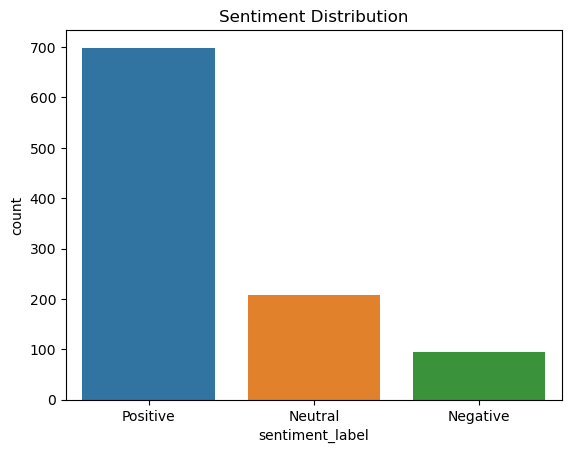

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment_label', data=df_reviews)
plt.title('Sentiment Distribution')
plt.show()




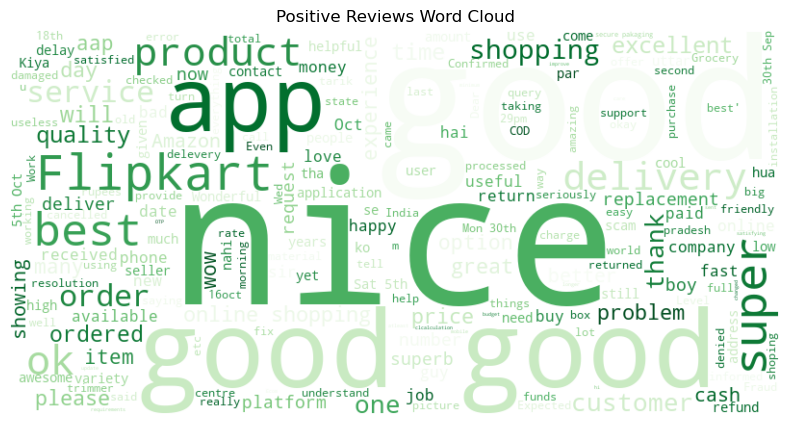

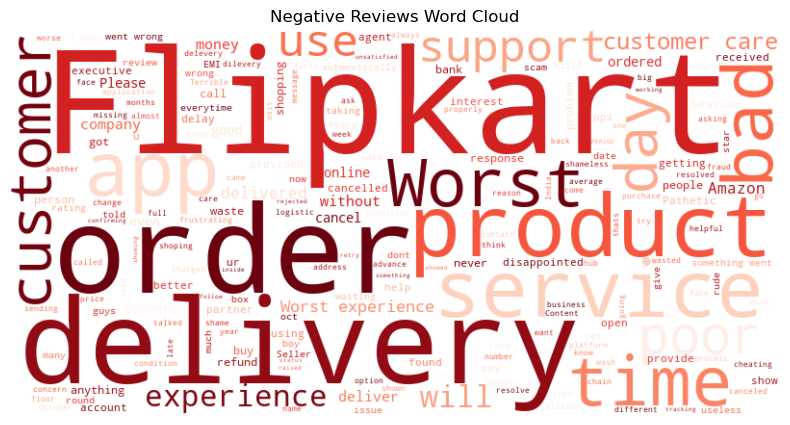

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title, color_map):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap=color_map).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Prepare text for word clouds
positive_reviews = ' '.join(df_reviews[df_reviews['sentiment_label'] == 'Positive']['content'])
negative_reviews = ' '.join(df_reviews[df_reviews['sentiment_label'] == 'Negative']['content'])

# Create word clouds with specified color maps
create_wordcloud(positive_reviews, "Positive Reviews Word Cloud", color_map='Greens')  # Blue shades for positive
create_wordcloud(negative_reviews, "Negative Reviews Word Cloud", color_map='Reds')  # Red shades for negative
